## Search Tool Members of the Parliament: GoogleAPI Failure Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
from tqdm.notebook import tqdm

In [2]:
twitter_credentials = []
with open('../../../../twitter_credentials.json', 'r') as f:
    twitter_credentials = json.load(f)        

# TwitterAPI Authentication
auth = tweepy.OAuthHandler(twitter_credentials['consumer_key'],
                                   twitter_credentials['consumer_secret'])
auth.set_access_token(twitter_credentials['access_token_key'],
                              twitter_credentials['access_token_secret'])
API = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, timeout=60*5)

# Fullnames

In [3]:
fn = pd.read_csv('Google-Search-Fullnames-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,@ViliardosV,@ViliardosV,,,,,
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,@anaik2020,@kaityAlex,@ΖΩΗΣ,,,,
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,@MariaAt03902914,@desp1navandi,@MariaAt03902914,@Kathimerini_gr,,,
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,@B3Vagenas,,,,,,
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,,,,,,,


In [4]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [5]:
cols = ['Twitter Handle']
cols += [f'Result {i+1}' for i in range(7)]
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


  0%|          | 0/300 [00:00<?, ?it/s]

@λ
@vanessaadamopoulou
@kwn
@mariaapatzidi
@xtarantilis
@vasilis_tsintzos
@patsisandreas
@stavros_keletsis
@atzitzikostas
@rapti_elena_official
@philip_fortomas
@stellabiziou
@vasilis_vasilikos
@nikos_voutsis
@ninakasimati_
@emiliosmarku
@miltoschatzigiannakis
@spiros_papadopoulos_official


  0%|          | 0/300 [00:00<?, ?it/s]

@khutaskostas
@κί
@michalis_marinos_official
@xtarantilis
@constantinosbogdanos
@olgakefalogianni
@adonis_georgiadis
@kostis_hatzidakis
@harry_theoharis
@ciao
@konsolasmanos
@andonis_cambourakis
@constantinosbogdanos
@nikoschristodoulides
@katerina_monogiou
@arampatzifoteini
@dbakoyannis
@ciao
@ύγειαΔραγασάκης
@3pfamilia
@rallia_
@moraitis_thanos
@xristosgiannoulis
@notopoulou_katerina
@rallia_
@eirini_papadopoulou


  0%|          | 0/300 [00:00<?, ?it/s]

@ΖΩΗΣ
@xtarantilis
@adonis_georgiadis
@mitoo44
@aktiimperialhotel
@stratos_simopoulos


Rate limit reached. Sleeping for: 33


@reeza_restaurant
@rafnar_hellas
@periklis_mantas
@tsapatakis_a
@ciao
@kalimeraellada_ant1
@ciao
@natasatheodoridou


  0%|          | 0/300 [00:00<?, ?it/s]

@iliasbogdanos
@rapti_elena_official
@marevagrabowskimitsotaki
@marevagrabowskimitsotaki
@haris_sianidis
@anna_michelle_nd
@dora_panteli_
@ciao
@rallia_
@α
@christosgiannoulis_
@alexistsipras


  0%|          | 0/300 [00:00<?, ?it/s]

@alexistsipras
@rallia_


  0%|          | 0/300 [00:00<?, ?it/s]

@mariaapatzidi


  0%|          | 0/300 [00:00<?, ?it/s]

@ethnosnewspaper


## With a Twitter Account 

In [6]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [7]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [8]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

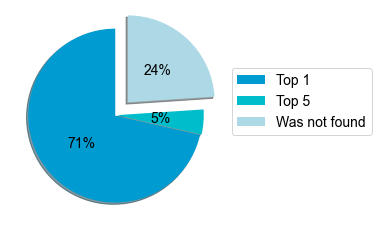

In [9]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [184]:
fn_acc['GoogleAPI Fullnames'] = found

In [192]:
fn_acc[['Name', 'GoogleAPI Fullnames']].reset_index().drop('index', axis=1).to_csv('../result-method-parliament-member-search.csv', index=False)

## Without a Twitter Account 

In [10]:
target_names = ['Has an Account', 'Does not have a Account']

In [11]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [12]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [13]:
correct.count(True), correct.count(False)

(38, 24)

## Final Results

In [14]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[181,  38],
       [ 57,  24]])

<AxesSubplot:>

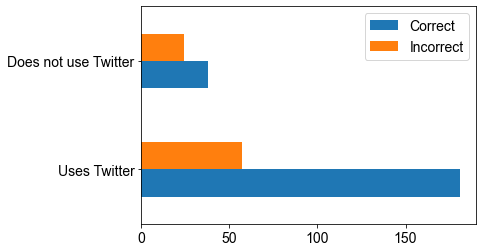

In [15]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [194]:
par_accs = list(fn_acc['Twitter Handle'])

In [213]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [215]:
fn['Total Parl Results'] = counts

In [217]:
len(fn[fn['Total Parl Results'] != 0])

19

---
# Surnames

In [3]:
fn = pd.read_csv('Google-Search-Surnames-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,@ViliardosV,@ViliardosV,,,,,
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,@xrisalex,@aalexopoulos97,@xrisalex,@christina,,,
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,@Athanas_HS,@athanasiou_marios,@XarAthan,@XarAthan,@verou_ath,@AthanasiouTh,
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,@loukas_vagenas,@B3Vagenas,,,,,
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,@AnnaAsimakopoul,@anna_michelle_nd,@A6TzzGauUShtz5c,,,,


In [4]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [5]:
cols = ['Twitter Handle']
cols += [f'Result {i+1}' for i in range(7)]
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


  0%|          | 0/300 [00:00<?, ?it/s]

@λ
@21
@sofia_manolakou
@mariaapatzidi
@rapti_elena_official
@RousopoulosgΘεόδωρος
@natasapazaitibhc
@panos_vlahos_official
@21
@rapti_elena_official
@philip_fortomas
@arampatzifoteini
@vikyhatzivasiliou
@leonidasbalafas
@athanasiou_marios
@emiliosmarku
@aris_lappino


  0%|          | 0/300 [00:00<?, ?it/s]

@athanasiou_marios
@anna_michelle_nd
@dannygiannakopoulou
@κί
@vanessaadamopoulou
@constantinosbogdanos
@kefalogiannis_
@adonis_georgiadis
@panagiotis_hatzidakis
@harry_theoharis
@panagiotis_hatzidakis
@supermariohezonja
@vlasis_kostouros
@3pfamilia
@tzcello
@atzitzikostas
@anna_michelle_nd
@nicosanastasiades
@stefkonstantinidis
@katerina_monogiou
@athanasiou_marios
@rachel_makri
@kwn_lampropoulos
@kefalogiannis_
@dbakoyannis
@ciao
@3pfamilia
@alexistsipras
@α
@alexistsipras
@miltoschatzigiannakis
@larentzakis_5
@notopoulou_katerina
@rallia_


  0%|          | 0/300 [00:00<?, ?it/s]

@loveitskaitv
@anna_michelle_nd
@voularinos
@spiros_papadopoulos_official


Rate limit reached. Sleeping for: 403


@alexistsipras
@spiros_papadopoulos_official


  0%|          | 0/300 [00:00<?, ?it/s]

@iliasbogdanos
@olgakefalogianni
@acci
@atzitzikostas
@panagiotiskonstantinidistr
@verou_ath
@zeta_makripoulia_official
@fanis_labropoulos
@dimitriskaradimos
@filio_lou
@kalimeraellada_ant1
@kalimeraellada_ant1
@elena_apostolou
@thanokokkalis
@alexistsipras


  0%|          | 0/300 [00:00<?, ?it/s]

@verou_ath
@filio_lou
@delta_christof
@elenasdiary_blog
@makistriantafyllopoulos
@delta_christof
@athinao1konomakou
@sokratismalamas


  0%|          | 0/300 [00:00<?, ?it/s]

@pxnguinvfx
@athinao1konomakou
@mariaapatzidi
@moraitis_thanos
@PetrosAulonitis


  0%|          | 0/300 [00:00<?, ?it/s]

@aristotelis_rigas
@GabriellaApollon
@aristotelis_rigas


## With a Twitter Account 

In [6]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [7]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [8]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

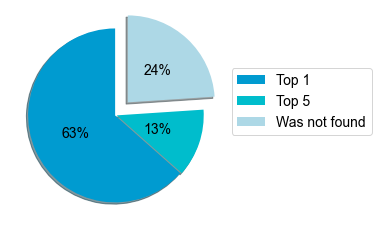

In [9]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [11]:
temp = pd.read_csv('../result-method-parliament-member-search.csv')
temp.head()

,Name,GoogleAPI Fullnames
0,Βιλιάρδος Βασίλειος,True
1,Αλεξοπούλου Αικατερίνη,True
2,Αθανασίου Μαρία,True
3,Βαγενάς Δημήτριος,True
4,Ασημακοπούλου Χάιδω,False


In [12]:
temp['GoogleAPI Surnames'] = found

In [14]:
temp.to_csv('../result-method-parliament-member-search.csv', index=False)

In [15]:
del temp

## Without a Twitter Account 

In [16]:
target_names = ['Has an Account', 'Does not have a Account']

In [17]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [18]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [19]:
correct.count(True), correct.count(False)

(26, 36)

## Final Results

In [20]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[181,  26],
       [ 57,  36]])

<AxesSubplot:>

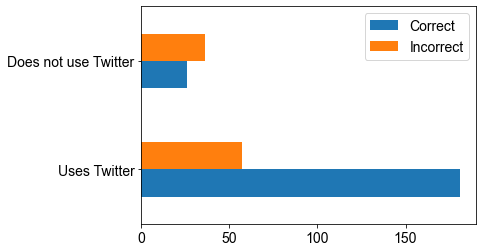

In [21]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [22]:
par_accs = list(fn_acc['Twitter Handle'])

In [23]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [24]:
fn['Total Parl Results'] = counts

In [25]:
len(fn[fn['Total Parl Results'] != 0])

18

# Fullnames Latin

In [3]:
fn = pd.read_csv('Google-Search-FullnamesLatin-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,@ViliardosV,@ViliardosV,,,,,,
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,@anaik2020,@kkroonenberg,@djnikas,,,,,
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,@mariaathanasiou,@athanasiou_marios,@45b1584e2f7d481,@athinadi,@hotelthesantamaria,,,
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,@DimitriosVagen1,,,,,,,
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,@eri__valentina,@village_gr,,,,,,


In [4]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [5]:
cols = ['Twitter Handle']
cols += [f'Result {i+1}' for i in range(7)]
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


  0%|          | 0/300 [00:00<?, ?it/s]

@eri__valentina
@konstantinopoulosa
@mariaapatzidi
@bakadima_fotini
@panagiotispikramenos
@constantinosbogdanos
@olgakefalogianni
@liza_tuktik
@papanikolaou_dim
@rapti_elena_official
@stratis_koukou
@kasestia
@marilenasoukouli
@katerina_monogiou
@philip_fortomas
@evripidisstylianidis
@leontaridis_theofilos
@manosvynichakis
@3pfamilia
@rallia_
@hippocratespsycho


  0%|          | 0/300 [00:00<?, ?it/s]

@athanasiou_marios
@paulodybala
@takistheodorikakos
@nitra_gallery
@kostis_hatzidakis
@miltiadisvarvitsiotis
@anna_michelle_nd
@spilioslivanos
@tsavdaridislazaros
@anna_michelle_nd
@alexandra__panagiotarou
@irinapapasynnefaki
@anna_michelle_nd
@miltoschrysomallis
@constantinosbogdanos
@archaeostoryteller
@dbakoyannis
@emiliosmarku
@notopoulou_katerina
@annavictoria
@eirini_papadopoulou


  0%|          | 0/300 [00:00<?, ?it/s]

@staehlekarine
@vasilis_kekatos
@mitoo44
@atzitzikostas
@anna_michelle_nd
@manosvynichakis
@sofia_zacharaki
@k_diminakis
@savvas_chionidis
@arampatzifoteini
@georgepapakostas
@mariaapatzidi
@rallia_


  0%|          | 0/300 [00:00<?, ?it/s]

@voularinos
@vassilistsigkristaris
@officialdannytrejo
@dora_panteli_
@3pfamilia
@omada_ypefthinotitas
@kostasbakoyannis
@arampatzifoteini
@kostasbakoyannis


  0%|          | 0/300 [00:00<?, ?it/s]

@hotelthesantamaria
@kostasbakoyannis
@man_chr_
@marevagrabowskimitsotaki
@katerina_monogiou


  0%|          | 0/300 [00:00<?, ?it/s]

@sofia_zacharaki
@mariaapatzidi


  0%|          | 0/300 [00:00<?, ?it/s]

@dkampolis_official


## With a Twitter Account 

In [6]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [7]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [8]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

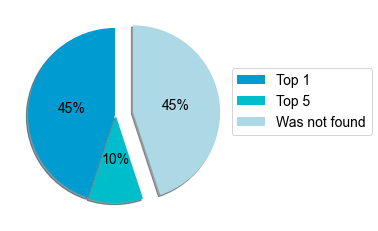

In [9]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [20]:
temp = pd.read_csv('../result-method-parliament-member-search.csv')
temp.head()

,Name,GoogleAPI Fullnames,GoogleAPI Surnames,TwitterAPI Fullnames,TwitterAPI Surnames,TwitterAPI SurnamesLatin
0,Βιλιάρδος Βασίλειος,True,True,False,True,True
1,Αλεξοπούλου Αικατερίνη,True,False,False,False,False
2,Αθανασίου Μαρία,True,False,False,False,False
3,Βαγενάς Δημήτριος,True,True,False,False,False
4,Ασημακοπούλου Χάιδω,False,False,False,True,False


In [21]:
temp['GoogleAPI SurnamesLatin'] = found

In [23]:
temp.to_csv('../result-method-parliament-member-search.csv', index=False)

In [24]:
del temp

## Without a Twitter Account 

In [10]:
target_names = ['Has an Account', 'Does not have a Account']

In [11]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [12]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [13]:
correct.count(True), correct.count(False)

(39, 23)

## Final Results

In [14]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[131,  39],
       [107,  23]])

<AxesSubplot:>

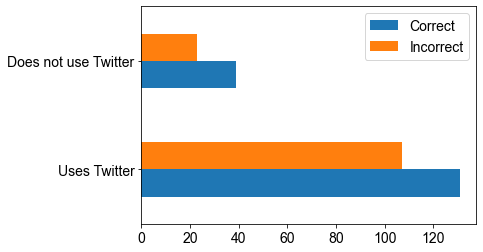

In [15]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [16]:
par_accs = list(fn_acc['Twitter Handle'])

In [17]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [18]:
fn['Total Parl Results'] = counts

In [19]:
len(fn[fn['Total Parl Results'] != 0])

14

# Classifier ND

# Fullnames

In [4]:
fn = pd.read_csv('Google-Search-Fullnames-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,174226430,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,1168241295149740032,0,0,0,0,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,1153988844498444288,0,0,0,0,0,0
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,1302266183790604288,0,0,0,0,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,0,0,0,0,0,0,0


In [6]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0]
    elif len(temp) == 1:
        temp += [0]
    result.append(temp)
result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]

## With a Twitter Account 

In [7]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [8]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [9]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

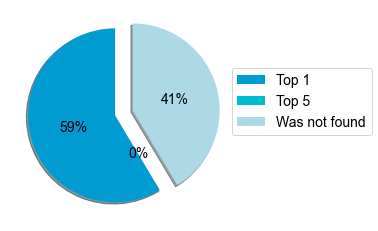

In [10]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [11]:
target_names = ['Has an Account', 'Does not have a Account']

In [12]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [13]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [14]:
correct.count(True), correct.count(False)

(56, 5)

## Final Results

In [15]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[140,  56],
       [ 99,   5]])

<AxesSubplot:>

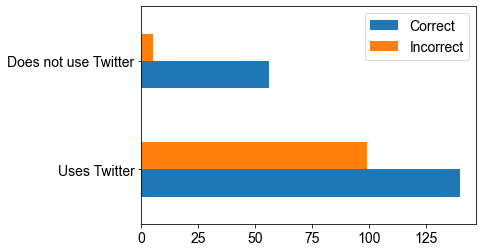

In [16]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

# Surnames

In [18]:
fn = pd.read_csv('Google-Search-Surnames-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,174226430,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,93629265,0,0,0,0,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,0,2840171877,0,0,0,1088970967,0
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,0,1302266183790604288,0,0,0,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,533041104,0,0,0,0,0,0


In [24]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2', 'Result 3', 'Result 4', 'Result 5']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0,0,0,0]
    while len(temp) < 5:
        temp += [0]
    result.append(temp)

result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]
fn['Result 3'] = result[:,2]
fn['Result 4'] = result[:,3]
fn['Result 5'] = result[:,4]

## With a Twitter Account 

In [25]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [26]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(4)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [27]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

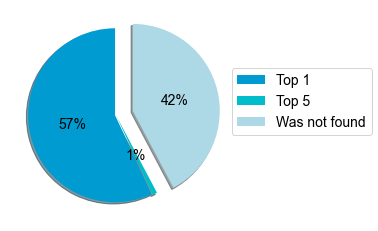

In [28]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [29]:
target_names = ['Has an Account', 'Does not have a Account']

In [30]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [31]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [32]:
correct.count(True), correct.count(False)

(51, 10)

## Final Results

In [33]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[138,  51],
       [101,  10]])

<AxesSubplot:>

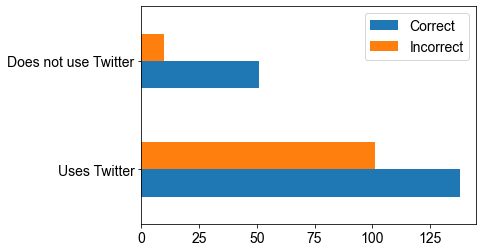

In [34]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

# Fullnames Latin

In [35]:
fn = pd.read_csv('Google-Search-FullnamesLatin-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,174226430,0,0,0,0,0,0,
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,1168241295149740032,0,0,0,0,0,0,
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,0,0,0,0,0,0,0,
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,0,0,0,0,0,0,0,
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,0,0,0,0,0,0,0,


In [36]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2', 'Result 3', 'Result 4', 'Result 5']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0,0,0,0]
    while len(temp) < 5:
        temp += [0]
    result.append(temp)

result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]
fn['Result 3'] = result[:,2]
fn['Result 4'] = result[:,3]
fn['Result 5'] = result[:,4]

## With a Twitter Account 

In [37]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [38]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(4)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [39]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

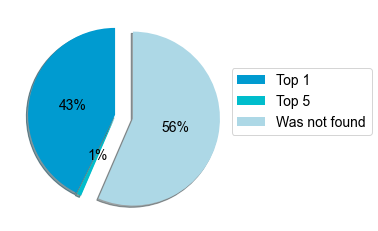

In [40]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.2))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [41]:
target_names = ['Has an Account', 'Does not have a Account']

In [42]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [43]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [44]:
correct.count(True), correct.count(False)

(59, 2)

## Final Results

In [45]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[104,  59],
       [135,   2]])

<AxesSubplot:>

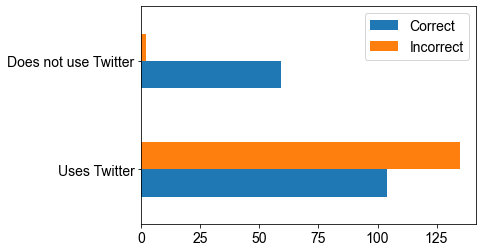

In [46]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')